In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.tsa import stattools as ts
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import datetime


/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36733 (\N{CJK UNIFIED IDEOGRAPH-8F7D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


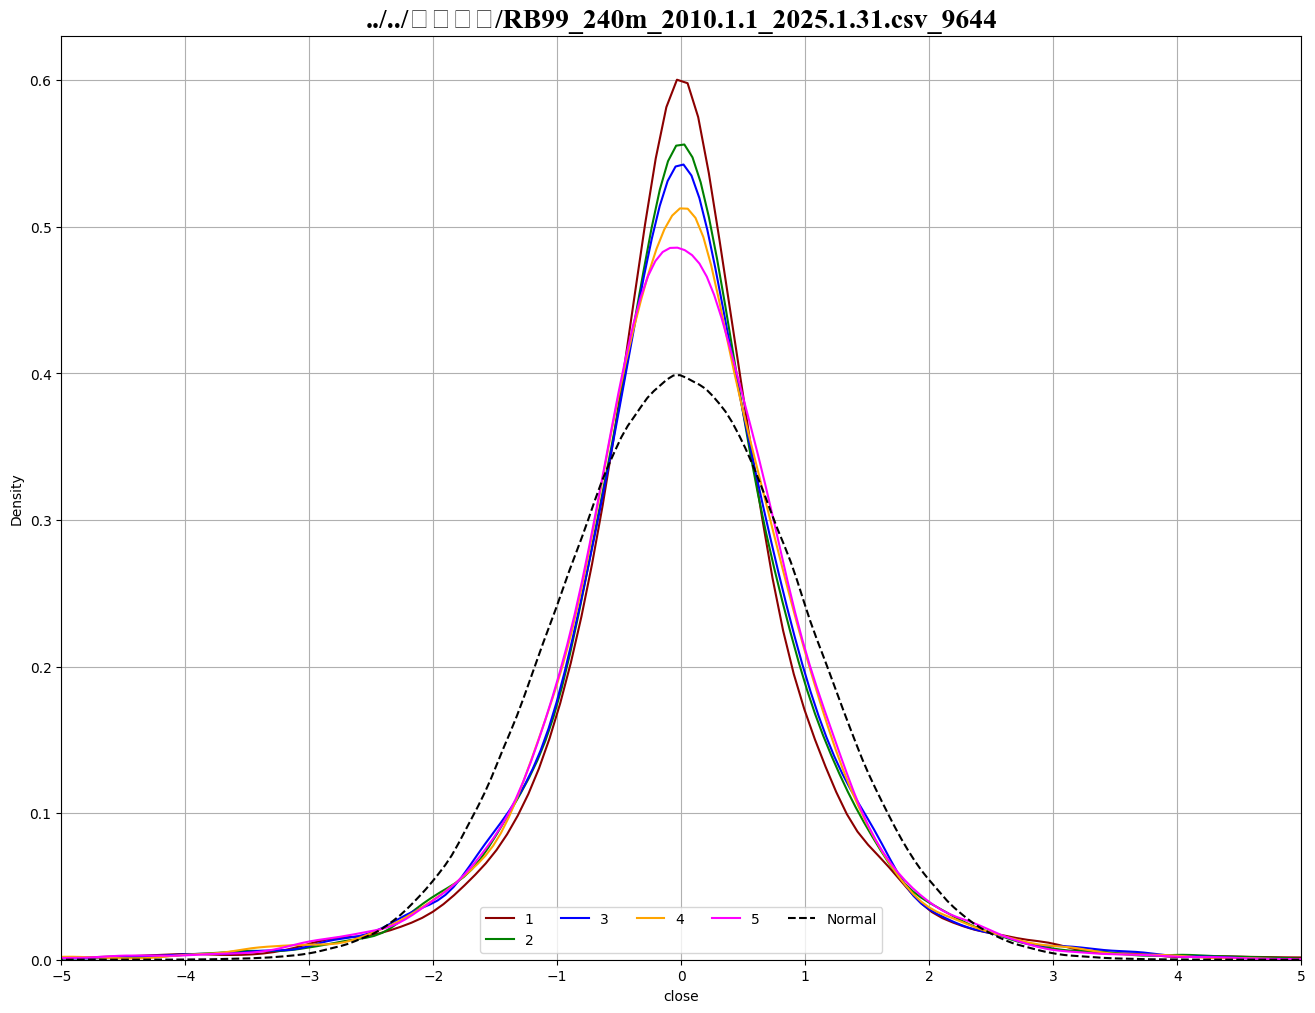

In [3]:
file_name = "../../数据下载/RB99_240m_2010.1.1_2025.1.31.csv"
bars = pd.read_csv(file_name)
bars.set_index("datetime", inplace=True)

returns_1 = (
    np.log(bars["close"]).diff().dropna()
)  ###############  一阶差分，同时删除缺失值  ###############
returns_2 = np.log(bars["close"]).diff(periods=2).dropna()
returns_3 = np.log(bars["close"]).diff(periods=3).dropna()
returns_4 = np.log(bars["close"]).diff(periods=4).dropna()
returns_5 = np.log(bars["close"]).diff(periods=5).dropna()


standard_1 = (
    returns_1 - returns_1.mean()
) / returns_1.std()  ###############  Z-score 标准化  ###############
standard_2 = (returns_2 - returns_2.mean()) / returns_2.std()
standard_3 = (returns_3 - returns_3.mean()) / returns_3.std()
standard_4 = (returns_4 - returns_4.mean()) / returns_4.std()
standard_5 = (returns_5 - returns_5.mean()) / returns_5.std()


plt.figure(figsize=(16, 12))


sns.kdeplot(standard_1, label="1", color="darkred")
sns.kdeplot(standard_2, label="2", color="green")
sns.kdeplot(standard_3, label="3", color="blue")
sns.kdeplot(standard_4, label="4", color="orange")
sns.kdeplot(standard_5, label="5", color="magenta")


sns.kdeplot(
    np.random.normal(size=1000000), label="Normal", color="black", linestyle="--"
)

plt.xticks(range(-5, 6))
plt.legend(loc=8, ncol=5)
plt.title(
    file_name + "_" + str(len(bars)),
    loc="center",
    fontsize=20,
    fontweight="bold",
    fontname="Times New Roman",
)
plt.xlim(-5, 5)
plt.grid(1)
plt.show()

plt.savefig(file_name + "_" + str(len(bars)) + ".jpg")
plt.close()